In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# GET SF from RPI

## Specifically, RPI excluding MIPs and indirect taxes (= RPIY)

In [2]:
## unadjusted index for RPIY
RPI = pd.read_csv('data/unadjustedts.csv')
RPI = RPI[1008:1336]
RPI['Title'] = pd.to_datetime(RPI['Title'], format='%Y %b')
RPI['unadjusted index'] = RPI['RPI:All items exc mortgage int payments and indirect taxes (RPIY) (Jan 1987=100)'].astype(float)
RPI.index = RPI['Title']

In [3]:
## adjusted index for RPIY (= SARPIY: Seasonally Adjusted RPIY)
RPI_adjusted = pd.read_csv('data/adjustedts.csv')
RPI_adjusted = RPI_adjusted.iloc[34:]
RPI_adjusted['Title'] = pd.to_datetime(RPI_adjusted['Title'], format='%Y %b')
RPI_adjusted.set_index(RPI_adjusted['Title'], inplace=True)
RPI_adjusted['unadjusted'] = RPI['unadjusted index']

RPI_adjusted['RPI:Seasonally adjusted all items exc. MIPs and indirect taxes (SARPIY): Indices'] = RPI_adjusted['RPI:Seasonally adjusted all items exc. MIPs and indirect taxes (SARPIY): Indices'].astype(float)

RPI_adjusted['SA factor'] = RPI_adjusted['RPI:Seasonally adjusted all items exc. MIPs and indirect taxes (SARPIY): Indices'] / RPI_adjusted['unadjusted']
RPI_adjusted['SA factor (in pct)'] = (RPI_adjusted['SA factor']-1) * 100

RPI_adjusted['unadjusted pct change'] = RPI_adjusted['unadjusted'].pct_change()
RPI_adjusted['adjusted pct change'] = RPI_adjusted['RPI:Seasonally adjusted all items exc. MIPs and indirect taxes (SARPIY): Indices'].pct_change()
RPI_adjusted


,Title,RPI:Seasonally adjusted all items exc. MIPs and indirect taxes (SARPIY): Indices,unadjusted,SA factor,SA factor (in pct),unadjusted pct change,adjusted pct change
Title,,,,,,,
1987-01-01,1987-01-01,100.4,100.0,1.004000,0.400000,NaN,NaN
1987-02-01,1987-02-01,100.8,100.4,1.003984,0.398406,0.004000,0.003984
1987-03-01,1987-03-01,101.0,100.7,1.002979,0.297915,0.002988,0.001984
1987-04-01,1987-04-01,101.1,101.5,0.996059,-0.394089,0.007944,0.000990
1987-05-01,1987-05-01,101.3,101.8,0.995088,-0.491159,0.002956,0.001978
...,...,...,...,...,...,...,...
2013-12-01,2013-12-01,238.9,238.5,1.001677,0.167715,0.006329,0.005471
2014-01-01,2014-01-01,239.6,237.6,1.008418,0.841751,-0.003774,0.002930
2014-02-01,2014-02-01,240.1,239.4,1.002924,0.292398,0.007576,0.002087


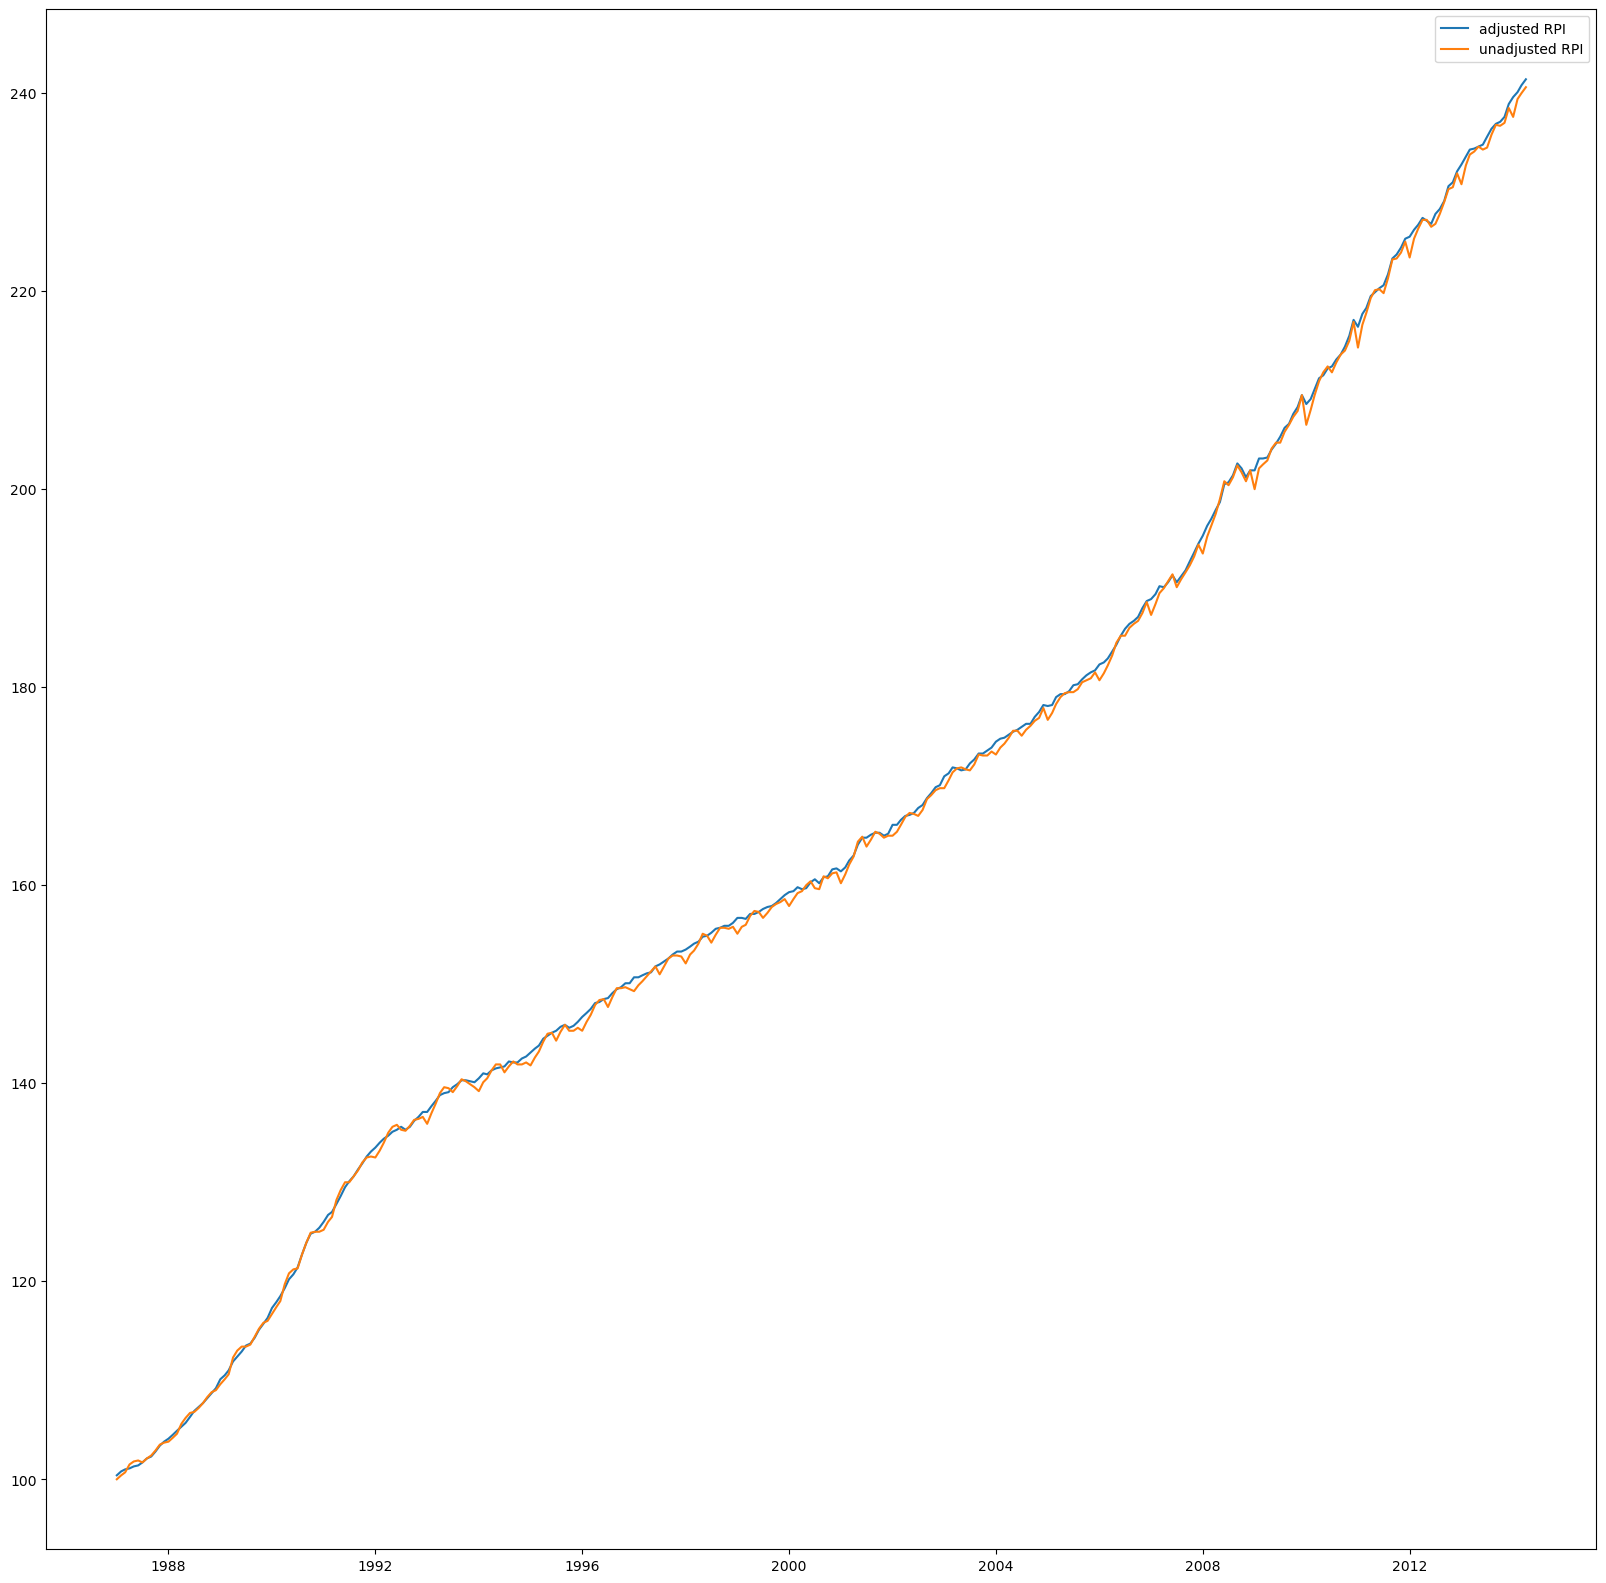

In [4]:
plt.figure(figsize=(20,20))
plt.plot(RPI_adjusted.index, list(RPI_adjusted['RPI:Seasonally adjusted all items exc. MIPs and indirect taxes (SARPIY): Indices']), label= 'adjusted RPI')
plt.plot(RPI_adjusted.index, list(RPI_adjusted['unadjusted']), label = 'unadjusted RPI')
plt.legend()
plt.show()

In [5]:
## Z-score of unadjusted RPI
q2_obj_ts = RPI_adjusted['unadjusted pct change'].copy().squeeze()  * 100

monthly_avg_unadjusted = q2_obj_ts.groupby(q2_obj_ts.index.month).mean()
monthly_std = q2_obj_ts.groupby(q2_obj_ts.index.month).std()
monthly_counts = q2_obj_ts.groupby(q2_obj_ts.index.month).count()

overall_avg = q2_obj_ts.mean()
overall_std = q2_obj_ts.std()

# Seasonality check
bar = 3
significant = lambda z: 'significant' if np.abs(z) > bar else 'not significant'

r_hi = np.argmax(monthly_avg_unadjusted) + 1
r_lo = np.argmin(monthly_avg_unadjusted) + 1

Z_lo_hi = (monthly_avg_unadjusted.loc[r_hi] - monthly_avg_unadjusted.loc[r_lo]) /\
            np.sqrt(monthly_std.loc[r_hi]**2 / monthly_counts.loc[r_hi] +
                    monthly_std.loc[r_lo]**2 / monthly_counts.loc[r_lo])

print('Highest average month: ', r_hi, "Monthly average: ", monthly_avg_unadjusted.loc[r_hi])
print('Lowest average month: ', r_lo, "Monthly average: ", monthly_avg_unadjusted.loc[r_lo])
print(f'Z-score between highest average and lowest average: {Z_lo_hi} -- {significant(Z_lo_hi)}')

Highest average month:  4 Monthly average:  0.598425415867293
Lowest average month:  1 Monthly average:  -0.3563243986985615
Z-score between highest average and lowest average: 8.52848510199513 -- significant


In [6]:
## Z-score of adjusted RPI


q2_obj_ts = RPI_adjusted['adjusted pct change'].copy().squeeze()  * 100

monthly_avg = q2_obj_ts.groupby(q2_obj_ts.index.month).mean()
monthly_std = q2_obj_ts.groupby(q2_obj_ts.index.month).std()
monthly_counts = q2_obj_ts.groupby(q2_obj_ts.index.month).count()

overall_avg = q2_obj_ts.mean()
overall_std = q2_obj_ts.std()

# Seasonality check
bar = 3
significant = lambda z: 'significant' if np.abs(z) > bar else 'not significant'

r_hi = np.argmax(monthly_avg) + 1
r_lo = np.argmin(monthly_avg) + 1

Z_lo_hi = (monthly_avg.loc[r_hi] - monthly_avg.loc[r_lo]) /\
            np.sqrt(monthly_std.loc[r_hi]**2 / monthly_counts.loc[r_hi] +
                    monthly_std.loc[r_lo]**2 / monthly_counts.loc[r_lo])

print('Highest average month: ', r_hi, "Monthly average: ", monthly_avg.loc[r_hi])
print('Lowest average month: ', r_lo, "Monthly average: ", monthly_avg.loc[r_lo])
print(f'Z-score between highest average and lowest average: {Z_lo_hi} -- {significant(Z_lo_hi)}')

Highest average month:  12 Monthly average:  0.30084393472918297
Lowest average month:  5 Monthly average:  0.23055387433865704
Z-score between highest average and lowest average: 1.2140266779232776 -- not significant


In [7]:
# SF of RPI

SF_RPI = (RPI_adjusted['SA factor']-1) * 100

q2_obj_ts = SF_RPI.copy().squeeze() 

sf = q2_obj_ts.groupby(q2_obj_ts.index.month).mean()
sf

Title
1     0.802040
2     0.489920
3     0.329761
4     0.026507
5    -0.210041
6    -0.106441
7     0.373322
8     0.215275
9     0.018144
10    0.095917
11    0.190262
12    0.210032
Name: SA factor, dtype: float64

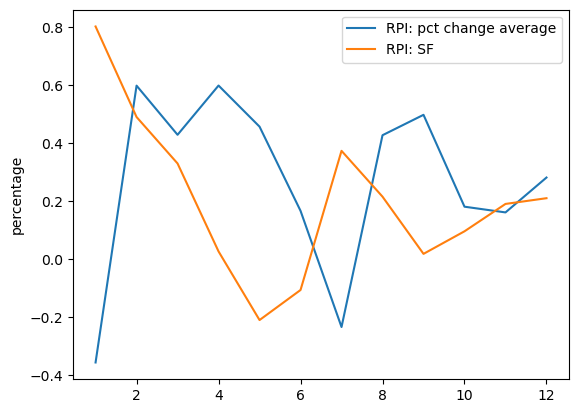

In [8]:
# Good looking.

plt.plot(monthly_avg_unadjusted, label = 'RPI: pct change average')
plt.plot(sf, label='RPI: SF')
plt.ylabel('percentage')
plt.legend()
plt.show()

In [9]:
# Try after 2014-04
# path to the csv file
path_to_unfiltered_RPI_ts = "data/unfiltered_RPI_ts.csv"
path_to_filtered_RPI_ts = "data/filtered_RPI_ts.csv"

unfiltered_RPI_ts = pd.read_csv(path_to_unfiltered_RPI_ts, header=None)
filtered_RPI_ts = pd.read_csv(path_to_filtered_RPI_ts, header=None)

mask = (pd.read_csv(path_to_unfiltered_RPI_ts, header=None) == pd.read_csv(path_to_filtered_RPI_ts, header=None))
object_RPI_ts = unfiltered_RPI_ts
# Pre-precessing out datesets
dataset_info = object_RPI_ts.iloc[:8].copy()

RPI_pct_change_ts = object_RPI_ts.iloc[8:].copy()
RPI_pct_change_ts.iloc[:,1] = RPI_pct_change_ts.iloc[:,1].astype(float)
RPI_pct_change_ts.index.name = None
#RPI_pct_change_ts_annually = RPI_pct_change_ts[:36].copy()
RPI_pct_change_ts_monthly = RPI_pct_change_ts[36:].copy()

# RPI_pct_change_ts_annually.iloc[:,0] = pd.to_datetime(RPI_pct_change_ts_annually.iloc[:,0], format='%Y')
# RPI_pct_change_ts_annually.set_index(0, inplace=True)
# RPI_pct_change_ts_annually.index.name = None
# RPI_pct_change_ts_annually.rename(columns={1: 'RPI_pct_change'}, inplace=True)

RPI_pct_change_ts_monthly.iloc[:,0] = pd.to_datetime(RPI_pct_change_ts_monthly.iloc[:,0], format='%Y %b')
RPI_pct_change_ts_monthly.set_index(0, inplace=True)
RPI_pct_change_ts_monthly.index.name = None
RPI_pct_change_ts_monthly.rename(columns={1: 'RPI_INDEX'}, inplace=True)
# Only include data after 1987 rebasing
starting_RPI = 100.
RPI_pct_change_ts_monthly_new = RPI_pct_change_ts_monthly[RPI_pct_change_ts_monthly.index >= "1987-01"].copy()


RPI_after_2014_04 = starting_RPI * (1 + RPI_pct_change_ts_monthly_new/100).cumprod()
RPI_after_2014_04 = RPI_after_2014_04[RPI_after_2014_04.index >= "2014-05-01"]
RPI_after_2014_04

,RPI_INDEX
2014-05-01,259.232944
2014-06-01,259.75141
2014-07-01,259.491658
2014-08-01,260.529625
2014-09-01,261.050684
...,...
2023-10-01,384.230361
2023-11-01,383.846131
2023-12-01,385.765362
2024-01-01,384.608065


In [10]:
sf = list(sf)

In [11]:
a = np.array(RPI_after_2014_04['RPI_INDEX'])
for i in range(118):
    a[i] = a[i]*(1 + sf[(i+4)%12]/100)
RPI_after_2014_04['adjusted index'] = a
RPI_after_2014_04['adjusted pct change'] = RPI_after_2014_04['adjusted index'].pct_change()
RPI_after_2014_04

,RPI_INDEX,adjusted index,adjusted pct change
2014-05-01,259.232944,258.688448,NaN
2014-06-01,259.75141,259.474929,0.003040
2014-07-01,259.491658,260.460399,0.003798
2014-08-01,260.529625,261.09048,0.002419
2014-09-01,261.050684,261.098049,0.000029
...,...,...,...
2023-10-01,384.230361,384.598905,-0.001224
2023-11-01,383.846131,384.576445,-0.000058
2023-12-01,385.765362,386.575592,0.005198
2024-01-01,384.608065,387.692775,0.002890


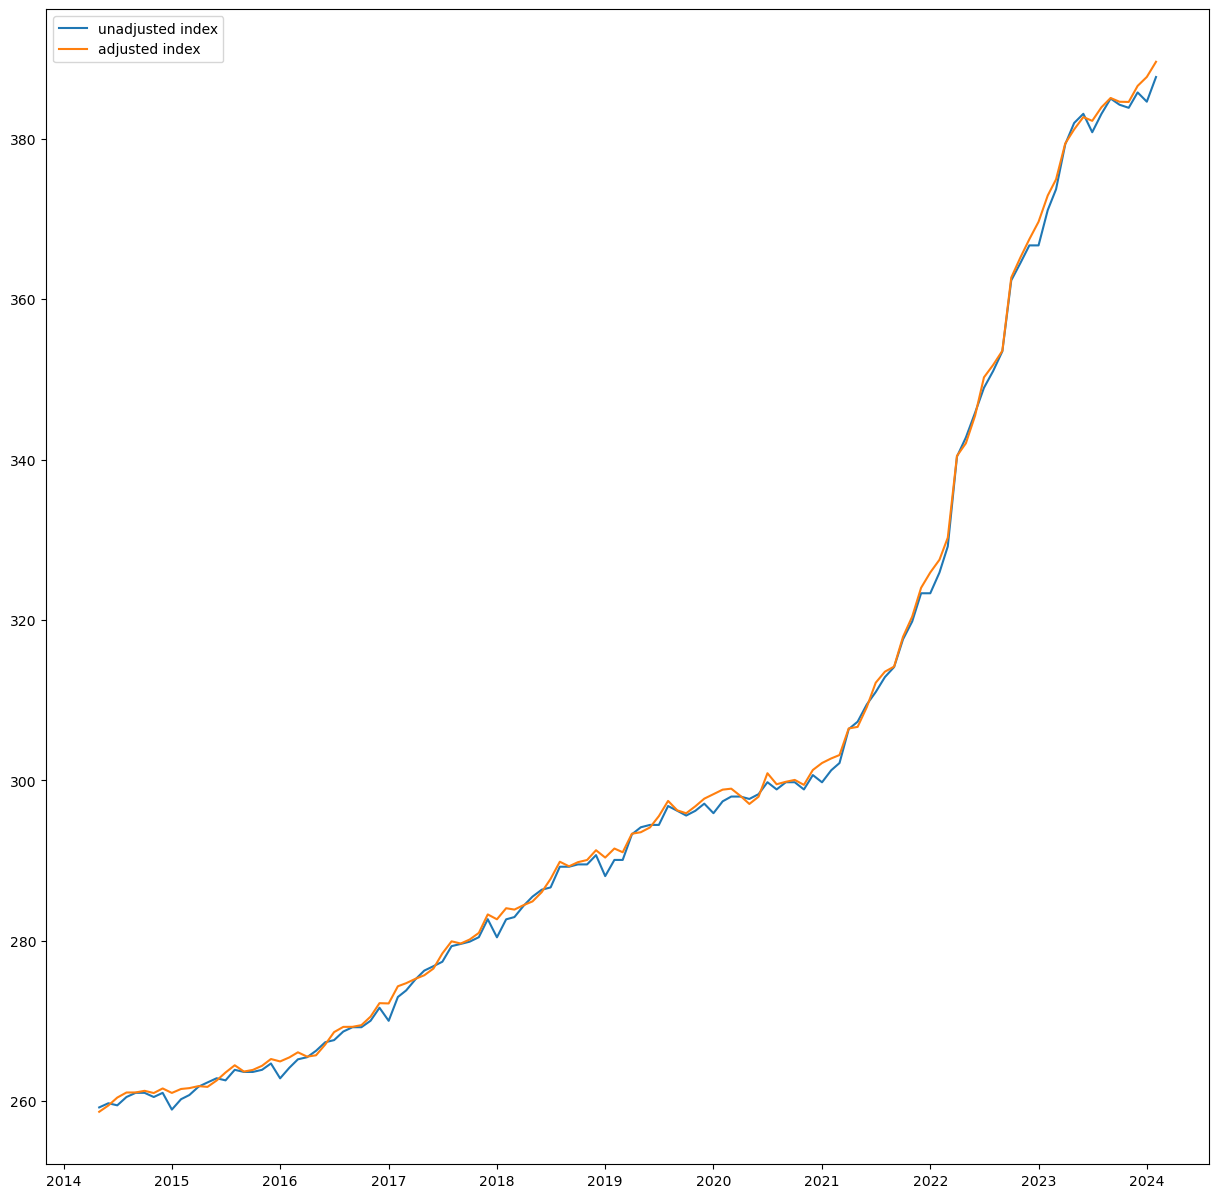

In [12]:
plt.figure(figsize=(15,15))
plt.plot(RPI_after_2014_04['RPI_INDEX'],label='unadjusted index')
plt.plot(RPI_after_2014_04['adjusted index'],label='adjusted index')
plt.legend()
plt.show()


In [13]:
## Z-score of adjusted RPI after 2014-04
q2_obj_ts = RPI_after_2014_04['adjusted pct change'].copy().squeeze()  * 100

monthly_avg = q2_obj_ts.groupby(q2_obj_ts.index.month).mean()
monthly_std = q2_obj_ts.groupby(q2_obj_ts.index.month).std()
monthly_counts = q2_obj_ts.groupby(q2_obj_ts.index.month).count()

overall_avg = q2_obj_ts.mean()
overall_std = q2_obj_ts.std()

# Seasonality check
bar = 3
significant = lambda z: 'significant' if np.abs(z) > bar else 'not significant'

r_hi = np.argmax(monthly_avg) + 1
r_lo = np.argmin(monthly_avg) + 1

Z_lo_hi = (monthly_avg.loc[r_hi] - monthly_avg.loc[r_lo]) /\
            np.sqrt(monthly_std.loc[r_hi]**2 / monthly_counts.loc[r_hi] +
                    monthly_std.loc[r_lo]**2 / monthly_counts.loc[r_lo])

print('Z-score of Adjusted RPI after 2014-04')
print(f'Z-score between highest average and lowest average: {Z_lo_hi} -- {significant(Z_lo_hi)}')

Z-score of Adjusted RPI after 2014-04
Z-score between highest average and lowest average: 1.8619034659533393 -- not significant


In [14]:
## RESULT: Seasonal factors for RPI index (we didn't find SF for forward curve yet..)

SF_RPI = (RPI_adjusted['SA factor']-1) * 100

q2_obj_ts = SF_RPI.copy().squeeze() 

sf = q2_obj_ts.groupby(q2_obj_ts.index.month).mean()
sf

Title
1     0.802040
2     0.489920
3     0.329761
4     0.026507
5    -0.210041
6    -0.106441
7     0.373322
8     0.215275
9     0.018144
10    0.095917
11    0.190262
12    0.210032
Name: SA factor, dtype: float64